In [ ]:
import numpy  as np
import pandas as pd
from   tqdm   import tqdm
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from IPython.display import clear_output
from scipy.signal import argrelextrema
import ast

import time
from datetime import datetime,date

In [ ]:
!git clone https://github.com/Deepinvest-team/deepinvest_open_environment.git

Cloning into 'deepinvest_open_environment'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [ ]:
import sys
sys.path.append('/content/deepinvest_open_environment')
from deepinvest_open_environment.Observer import Observers

Import Trainset

In [ ]:
#asset01-train
!gdown --id 1mkfE7JewHpNq4-MfGJ9yjqBcvaI3EpPT
#asset02-train
!gdown --id 1TDQVek--7_w7MrUsB4JxdJiU5Yu3AN6O
#asset03-train
!gdown --id 1BQFi8d3akjVqsgiESKmAx03XUkvo6VbT
#asset04-train
!gdown --id 1S0xcqFTHR10eKwvI4UFb2hC6E-6-iVgp
#asset05-train
!gdown --id 1h1CLq-io9ejMKbe0X6o89eESS9HoHG5m

Downloading...
From: https://drive.google.com/uc?id=1mkfE7JewHpNq4-MfGJ9yjqBcvaI3EpPT
To: /content/Asset01_train.csv
100% 198k/198k [00:00<00:00, 69.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TDQVek--7_w7MrUsB4JxdJiU5Yu3AN6O
To: /content/Asset02_train.csv
100% 194k/194k [00:00<00:00, 81.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BQFi8d3akjVqsgiESKmAx03XUkvo6VbT
To: /content/Asset03_train.csv
100% 193k/193k [00:00<00:00, 78.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S0xcqFTHR10eKwvI4UFb2hC6E-6-iVgp
To: /content/Asset04_train.csv
100% 202k/202k [00:00<00:00, 67.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h1CLq-io9ejMKbe0X6o89eESS9HoHG5m
To: /content/Asset05_train.csv
100% 199k/199k [00:00<00:00, 87.1MB/s]


Import Testset

In [ ]:
#asset01-test
!gdown --id 1VxP6cVvkH3pzUBpzv94if9StIJpzzmnh
#asset02-test
!gdown --id 1EEh2Nb6nR_g8jjDgiJw_zLZJQb7uPfYV
#asset03-test
!gdown --id 1PokuhfrnWdfyHvdQ94qcJQaurGnqsueV
#asset04-test
!gdown --id 1L5WrFoXtW4bm6406rc5y6HEJ336woQyK
#asset05-test
!gdown --id 1ES3L70ysVHc95OPIHZzbpNBrzy6p3YTV

Downloading...
From: https://drive.google.com/uc?id=1VxP6cVvkH3pzUBpzv94if9StIJpzzmnh
To: /content/Asset01_test.csv
100% 23.3k/23.3k [00:00<00:00, 30.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EEh2Nb6nR_g8jjDgiJw_zLZJQb7uPfYV
To: /content/Asset02_test.csv
100% 22.9k/22.9k [00:00<00:00, 30.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PokuhfrnWdfyHvdQ94qcJQaurGnqsueV
To: /content/Asset03_test.csv
100% 22.7k/22.7k [00:00<00:00, 30.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L5WrFoXtW4bm6406rc5y6HEJ336woQyK
To: /content/Asset04_test.csv
100% 23.1k/23.1k [00:00<00:00, 33.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ES3L70ysVHc95OPIHZzbpNBrzy6p3YTV
To: /content/Asset05_test.csv
100% 23.5k/23.5k [00:00<00:00, 32.9MB/s]


สร้าง environment
 * Observers(windowsize,train=True)
 * Observers จะเป็นสภาพแวดล้อมที่ใช้ในการทดสอบโมเดล โดย parameter จะประกอบไปด้วย window size ซึ่งเป็นขนาดของข้อมูลย้อนหลังที่ต้องการเห็น และ train จะเป็นค่า True หรือ False ซึ่งเป็นค่าที่ใช้เปลี่ยนข้อมูลของ environment โดย train ระบบจะดึงข้อมูลชุด train มาให้ ส่วน test ระบบจะดึงข้อมูลส่วน test มาให้

In [ ]:
observers = Observers(30,train=True)
observers_test = Observers(30, train=False)

**getCodeAsset**
  * getCodeAsset บอกรหัสของ Asset ที่ใช้ในการเปิดคำสั่งซื้อขาย

In [ ]:
observers.getCodeAsset()

['Asset01', 'Asset02', 'Asset03', 'Asset04', 'Asset05']

In [ ]:
observers_test.getCodeAsset()

['Asset01', 'Asset02', 'Asset03', 'Asset04', 'Asset05']

**getDataset**
  * getDataset เรียกข้อมูลย้อนหลังทั้งหมด

In [ ]:
observers.getDataset()['Asset01']

,open,high,low,close,volume
timestamp,,,,,
2010-06-23,12.707242,12.785209,12.661818,12.687096,74937
2010-06-24,12.686903,12.765063,12.666176,12.690777,69683
2010-06-25,12.690292,12.736782,12.644093,12.697363,57886
2010-06-28,12.696878,12.733683,12.682738,12.708017,25555
2010-06-29,12.700268,12.754797,12.660462,12.747920,46179
...,...,...,...,...,...
2018-12-24,10.966692,11.001172,10.962431,10.978218,43144
2018-12-26,10.978121,11.003690,10.976571,10.992068,42956
2018-12-27,10.991971,11.087468,10.978315,11.064320,66875


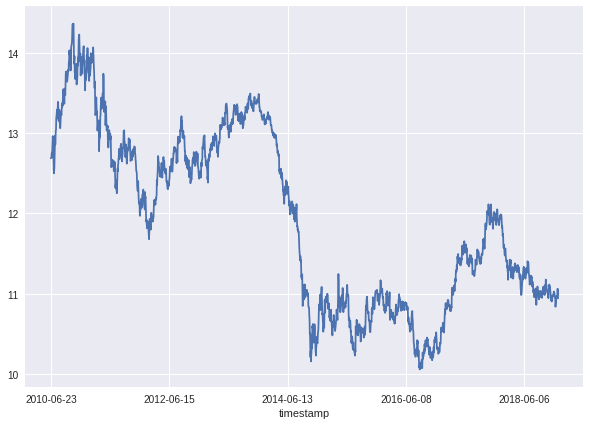

In [ ]:
observers.getDataset()['Asset01'].loc[:, 'close'].plot(figsize=(10,7))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

# Data

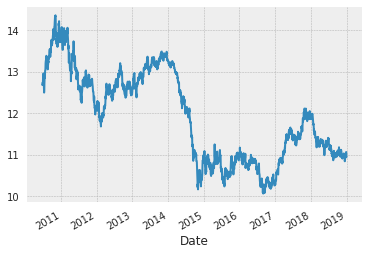

In [ ]:
df_a1['close'].plot()

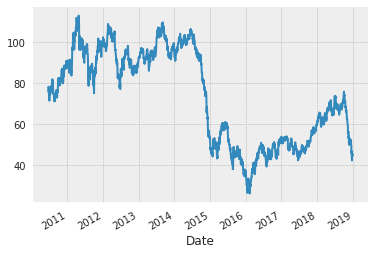

In [ ]:
df_a2['close'].plot()

# LSTM

In [ ]:
!pip install ta -q

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from sklearn.preprocessing import RobustScaler
plt.style.use("bmh")

# Technical Analysis library
import ta

# Neural Network library
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
# Loading in the Data
df_a1 = observers.getDataset()['Asset01']
df_a2 = observers.getDataset()['Asset02']
df_a3 = observers.getDataset()['Asset03']
df_a4 = observers.getDataset()['Asset04']
df_a5 = observers.getDataset()['Asset05']

In [ ]:
# Loading the test data
df_test_a1 = observers_test.getDataset()['Asset01']
df_test_a2 = observers_test.getDataset()['Asset02']
df_test_a3 = observers_test.getDataset()['Asset03']
df_test_a4 = observers_test.getDataset()['Asset04']
df_test_a5 = observers_test.getDataset()['Asset05']

In [ ]:
df_a1.tail()

,open,high,low,close,volume
timestamp,,,,,
2018-12-24,10.966692,11.001172,10.962431,10.978218,43144
2018-12-26,10.978121,11.003690,10.976571,10.992068,42956
2018-12-27,10.991971,11.087468,10.978315,11.064320,66875
2018-12-28,11.064320,11.077008,10.985094,11.014828,71203
2018-12-31,11.014828,11.031874,10.918169,10.944997,79566


In [ ]:
df_test_a1.tail()

,open,high,low,close,volume
timestamp,,,,,
2019-12-24,10.883398,10.997298,10.858507,10.934827,94001
2019-12-26,10.989840,11.134636,10.982867,11.075943,187327
2019-12-27,11.075943,11.096863,10.919525,10.935215,190339
2019-12-30,10.935215,11.008533,10.895989,10.906353,129097
2019-12-31,10.905868,10.976571,10.707513,10.815311,172884


change index to datetime


In [ ]:
def change_to_datetime(df):
  df['Date'] = pd.to_datetime(df.index)
  df.set_index('Date', inplace=True)

In [ ]:
change_to_datetime(df_a1)
change_to_datetime(df_a2)
change_to_datetime(df_a3)
change_to_datetime(df_a4)
change_to_datetime(df_a5)

change_to_datetime(df_test_a1)
change_to_datetime(df_test_a2)
change_to_datetime(df_test_a3)
change_to_datetime(df_test_a4)
change_to_datetime(df_test_a5)

try df_a1

In [ ]:
df = ta.add_all_ta_features(df_a1.copy(), open="open", high="high", low="low", close="close", volume="volume", fillna=True)
df.drop(['open', 'high', 'low', 'volume'], axis=1, inplace=True)
df.tail()

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning:

invalid value encountered in double_scalars



,close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,...,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-24,10.978218,-3.821199e+06,2780533,-0.082937,170.908434,1.465439,-0.762715,127.224521,10.954137,41.186912,770.483448,10.963167,11.054920,10.871414,1.673845,0.582019,0.0,0.0,10.932445,10.988513,10.876377,1.025724,0.908188,0.0,0.0,10.82393,11.059865,10.941898,2.152065,0.653941,0.053896,0.829582,-0.013053,-0.018351,0.005298,10.941777,10.957029,10.952414,10.965467,0.967694,...,0.304152,10.912551,10.941898,10.927224,11.014828,22.185917,16.106173,18.684454,18.542328,30.655398,11.063836,11.058945,44.0,72.0,-28.0,10.827191,10.9915,0.0,0.0,51.655571,0.994007,0.845370,0.791116,-6.930189,54.559441,65.394089,59.674330,-34.605911,-0.026004,-0.305200,-0.119040,-0.167287,0.048247,-4.296831,-1.951637,-2.345195,10.952053,0.098908,0.098859,-13.469422
2018-12-26,10.992068,-3.815063e+06,2823489,-0.109386,231.484538,0.525849,-0.765176,96.865569,10.951074,47.418430,771.455483,10.963641,11.055888,10.871395,1.682775,0.654078,0.0,0.0,10.935896,10.989698,10.882094,0.983952,1.022022,1.0,0.0,10.82393,11.059865,10.941898,2.151972,0.712644,0.051218,0.829706,-0.008923,-0.016466,0.007543,10.940695,10.959801,10.958514,10.967437,0.963881,...,0.549171,10.913810,10.941898,10.927854,11.014828,42.566820,15.049227,18.343324,17.869329,46.956004,11.045797,11.058945,40.0,68.0,-28.0,10.834150,10.9915,0.0,0.0,53.476009,1.000000,0.938884,0.860515,-4.876234,53.223458,71.264368,65.818281,-28.735632,-0.009135,-0.117931,-0.081360,-0.150102,0.068742,-6.021308,-2.765571,-3.255737,10.952875,0.126159,0.126080,-13.360256
2018-12-27,11.064320,-3.776552e+06,2890364,-0.049027,888.684889,6.979417,-0.303380,493.772315,10.952173,47.098288,771.455483,10.967937,11.070012,10.865862,1.861331,0.972122,0.0,0.0,10.945313,11.006244,10.884383,1.113360,1.476580,1.0,0.0,10.82393,11.087468,10.955699,2.402801,0.912165,0.057012,0.828581,0.000178,-0.013137,0.013315,10.947572,10.963496,10.974792,10.974614,0.971668,...,1.136603,10.960155,10.955699,10.957927,11.014828,71.283410,15.830584,26.283415,15.440186,131.870614,11.040858,11.054393,100.0,64.0,36.0,10.844322,10.9915,0.0,0.0,61.599668,1.000000,0.998002,0.927419,-0.249577,57.857973,91.216465,75.958307,-8.783535,0.009449,0.751416,0.001624,-0.119757,0.121381,-3.938690,-3.000195,-0.938495,10.959546,0.657315,0.655164,-12.790760
2018-12-28,11.014828,-3.801686e+06,2819161,-0.043730,258.304302,-0.237547,-0.270913,121.080054,10.953493,46.699943,771.455483,10.969859,11.073927,10.865792,1.897331,0.716057,0.0,0.0,10.960290,11.016446,10.904135,1.024708,0.985598,0.0,0.0,10.82393,11.087468,10.955699,2.402380,0.724366,0.060502,0.835036,0.003359,-0.009838,0.013197,10.952883,10.967713,10.980951,10.977593,0.987709,...,1.939853,10.977879,10.955699,10.966789,11.014828,85.641705,16.556131,23.

In [ ]:
## Scaling

# Scale fitting the close prices separately for inverse_transformations purposes later
close_scaler = RobustScaler()

close_scaler.fit(df[['close']])

# Normalizing/Scaling the DF
scaler = RobustScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
df.tail()

,close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,...,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-24,-0.473023,-1.271092,0.839016,-0.387600,0.089834,0.258880,-0.254944,0.184927,-0.504263,-0.446447,-0.695813,-0.496472,-0.532152,-0.478310,-0.719052,0.162035,0.0,0.0,-0.513454,-0.531518,-0.499582,-0.819699,0.557578,0.0,0.0,-0.507764,-0.553564,-0.530789,-0.658488,0.337781,-1.007985,-0.322213,-0.132349,-0.223899,0.186694,-0.507345,-0.501170,-0.502081,-0.493452,-0.120634,...,0.049881,-0.531766,-0.513408,-0.523347,-0.479927,-0.287470,-0.505884,-0.122335,-0.150850,0.194136,-0.452265,-0.458539,-0.058824,0.294118,-0.035714,-0.524329,-0.544697,0.0,0.0,0.112914,0.708124,0.527090,0.450126,-0.245522,0.368398,0.316298,0.227308,0.316298,-0.098022,-0.129915,-0.146282,-0.244795,0.209658,-0.528060,-0.221441,-0.699588,-0.510570,0.139083,0.139486,-0.473023
2018-12-26,-0.465930,-1.269123,0.870597,-0.533245,0.124418,0.101437,-0.255810,0.141396,-0.505843,-0.140107,-0.692595,-0.496228,-0.531657,-0.478320,-0.714528,0.292817,0.0,0.0,-0.511680,-0.530906,-0.496645,-0.884773,0.703894,1.0,0.0,-0.507764,-0.553564,-0.530789,-0.658535,0.444237,-1.078477,-0.322111,-0.085322,-0.201005,0.272151,-0.507900,-0.499751,-0.498945,-0.492441,-0.137554,...,0.082127,-0.531109,-0.513408,-0.523019,-0.479927,-0.076751,-0.587908,-0.158849,-0.223912,0.286497,-0.461651,-0.458539,-0.117647,0.235294,-0.035714,-0.520833,-0.544697,0.0,0.0,0.224010,0.716648,0.674176,0.563116,-0.169412,0.278624,0.420296,0.340005,0.420296,-0.021466,-0.048718,-0.095152,-0.219748,0.304262,-0.770893,-0.353473,-0.983472,-0.510143,0.181417,0.181780,-0.465930
2018-12-27,-0.428927,-1.256763,0.919764,-0.200865,0.499622,1.182835,-0.093182,0.710511,-0.505276,-0.155845,-0.692595,-0.494024,-0.524429,-0.481266,-0.624078,0.870041,0.0,0.0,-0.506839,-0.522365,-0.495469,-0.683178,1.288155,1.0,0.0,-0.507764,-0.539460,-0.523543,-0.530272,0.806063,-0.925959,-0.323041,0.018306,-0.160589,0.491927,-0.504371,-0.497860,-0.490578,-0.488759,-0.102999,...,0.159436,-0.506917,-0.506271,-0.507372,-0.479927,0.220151,-0.527271,0.691032,-0.487626,0.767634,-0.464221,-0.460870,0.764706,0.176471,0.535714,-0.515722,-0.544697,0.0,0.0,0.719771,0.716648,0.767162,0.672045,0.002028,0.590049,0.773770,0.526000,0.773770,0.062878,0.328216,0.017454,-0.175520,0.547244,-0.477628,-0.391532,-0.261015,-0.506676,1.006538,1.003832,-0.428927
2018-12-28,-0.454274,-1.264830,0.867415,-0.171697,0.139730,-0.026482,-0.081749,0.176117,-0.504596,-0.175428,-0.692595,-0.493038,-0.522425,-0.481303,-0.605841,0.405304,0.0,0.0,-0.499140,-0.517098,-0.485324,-0.821281,0.657077,0.0,0.0,-0.507764,-0.539460,-0.523543,-0.530487,0.465496,-0.834078,-0.317700,0.054520,-0.120534,0.487413,-0.501647,-0.495701,-0.487412,-0.487230,-0.031816,...,0.265149,-0.497665,-0.506271,-0.502761,-0.479927,0.368602,-

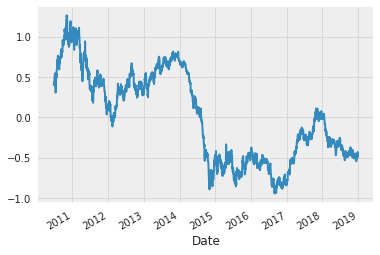

In [ ]:
df['close'].plot()

In [ ]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)
  
  
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
    
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.7):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass
          
          
def validater(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=df.index, columns=[df.columns[0]])

    for i in range(n_per_in, len(df)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = df[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later, frequency uses business days
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        predictions.update(pred_df)
        
    return predictions


def val_rmse(df1, df2):
    """
    Calculates the root mean square error between the two Dataframes
    """
    df = df1.copy()
    
    # Adding a new column with the closing prices from the second DF
    df['close2'] = df2.close
    
    # Dropping the NaN values
    df.dropna(inplace=True)
    
    # Adding another column containing the difference between the two DFs' closing prices
    df['diff'] = df.close - df.close2
    
    # Squaring the difference and getting the mean
    rms = (df[['diff']]**2).mean()
    
    # Returning the sqaure root of the root mean square
    return float(np.sqrt(rms))

In [ ]:
# How many periods looking back to learn
n_per_in  = 10
# How many periods to predict
n_per_out = 5
# Features 
n_features = df.shape[1]
# Splitting the data into appropriate sequences
X, y = split_sequence(df.to_numpy(), n_per_in, n_per_out)

In [ ]:
X.shape

(2130, 10, 87)

In [ ]:
y.shape

(2130, 5)

In [ ]:
## Creating the NN

# Instatiating the model
model = Sequential()

# Activation
activ = "tanh"

# Input layer
model.add(LSTM(90, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=2, 
            n_nodes=30, 
            activation=activ)

# Final Hidden layer
model.add(LSTM(60, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

# Compiling the data with selected specifications
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 90, 90)            64080     
                                                                 
 lstm_23 (LSTM)              (None, 90, 30)            14520     
                                                                 
 lstm_24 (LSTM)              (None, 90, 30)            7320      
                                                                 
 lstm_25 (LSTM)              (None, 60)                21840     
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                                 
Total params: 109,590
Trainable params: 109,590
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Fitting and Training
res = model.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
15/15 [==============================] - 10s 222ms/step - loss: 0.1665 - accuracy: 0.0220 - val_loss: 0.0317 - val_accuracy: 0.0197
Epoch 2/50
15/15 [==============================] - 1s 100ms/step - loss: 0.0382 - accuracy: 0.0401 - val_loss: 0.0201 - val_accuracy: 0.0296
Epoch 3/50
15/15 [==============================] - 1s 99ms/step - loss: 0.0167 - accuracy: 0.0313 - val_loss: 0.0192 - val_accuracy: 0.0394
Epoch 4/50
15/15 [==============================] - 2s 101ms/step - loss: 0.0112 - accuracy: 0.0401 - val_loss: 0.0245 - val_accuracy: 0.0345
Epoch 5/50
15/15 [==============================] - 1s 100ms/step - loss: 0.0085 - accuracy: 0.0434 - val_loss: 0.0150 - val_accuracy: 0.0296
Epoch 6/50
15/15 [==============================] - 2s 101ms/step - loss: 0.0068 - accuracy: 0.0417 - val_loss: 0.0202 - val_accuracy: 0.0345
Epoch 7/50
15/15 [==============================] - 1s 100ms/step - loss: 0.0058 - accuracy: 0.0477 - val_loss: 0.0289 - val_accuracy: 0.0296
Epoch 

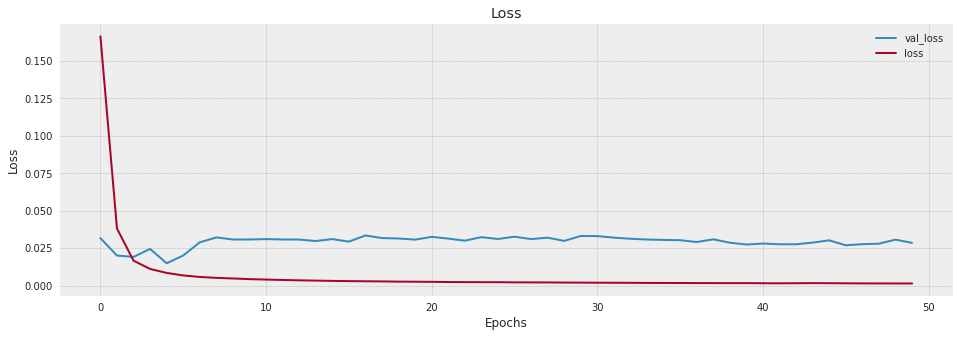

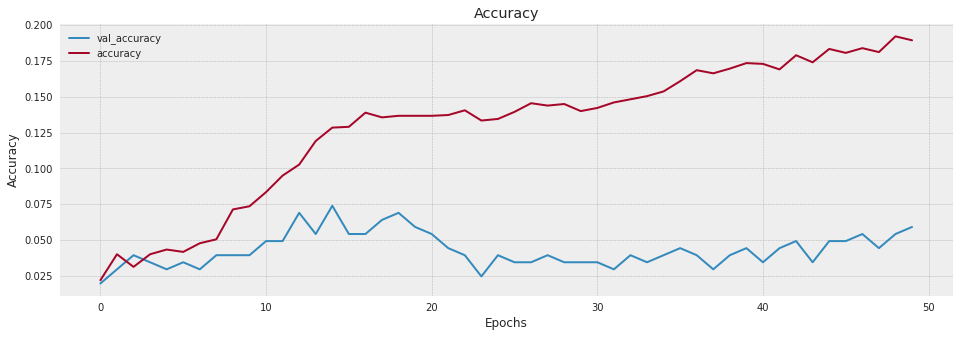

In [ ]:
visualize_training_results(res)

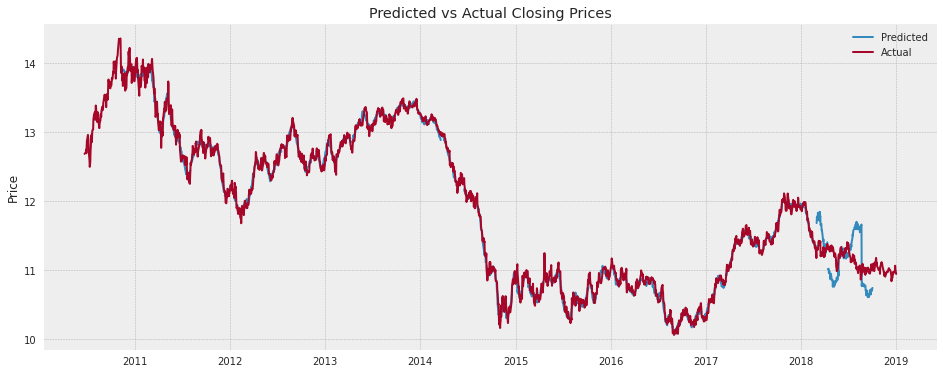

In [ ]:
# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df[["close"]]), 
                      index=df.index, 
                      columns=[df.columns[0]])

# Getting a DF of the predicted values to validate against
predictions = validater(n_per_in, n_per_out)

# Printing the RMSE
# print("RMSE:", val_rmse(actual, predictions))
    
# Plotting
plt.figure(figsize=(16,6))

# Plotting those predictions
plt.plot(predictions, label='Predicted')

# Plotting the actual values
plt.plot(actual, label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
#plt.xlim('2017-05', '2018-05')
plt.show()

                close
2019-01-01  11.054954
2019-01-02  11.059486
2019-01-03  10.965507
2019-01-04  10.982139
2019-01-07  10.993825
2019-01-08  11.006104
2019-01-09  10.914412
2019-01-10  11.011036
2019-01-11  10.921463
2019-01-14  10.901504
2019-01-15  10.914338
2019-01-16  10.938507
2019-01-17  10.902236
2019-01-18  10.852218
2019-01-21  10.980379
2019-01-22  10.888021
2019-01-23  10.895172
2019-01-24  10.892998
2019-01-25  10.880285
2019-01-28  10.904074
2019-01-29  10.898345
2019-01-30  10.918340
2019-01-31  10.890032
2019-02-01  10.938066
2019-02-04  10.965586
2019-02-05  10.919790
2019-02-06  10.930531
2019-02-07  10.935561
2019-02-08  11.012076
2019-02-11  10.953083


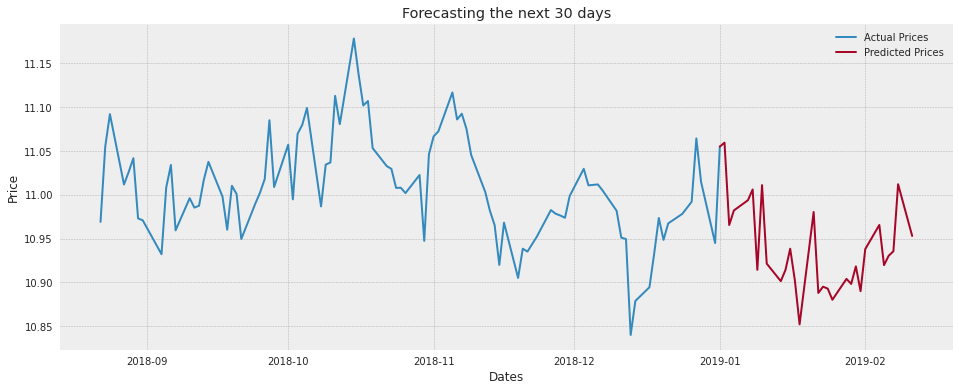

In [ ]:
# Predicting off of the most recent days from the original DF
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features))

# Transforming the predicted values back to their original format
yhat = close_scaler.inverse_transform(yhat)[0]

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, 
                     index=pd.date_range(start=df.index[-1]+timedelta(days=1), 
                                         periods=len(yhat), 
                                         freq="B"), 
                     columns=[df.columns[0]])

# Number of periods back to plot the actual values
pers = n_per_in

# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df[["close"]].tail(pers)), 
                      index=df.close.tail(pers).index, 
                      columns=[df.columns[0]]).append(preds.head(1))

# Printing the predicted prices
print(preds)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.show()

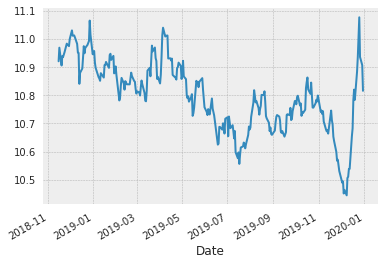

In [ ]:
df_test_a1['close'].plot()

### df_a2

In [ ]:
df2 = ta.add_all_ta_features(df_a1.copy(), open="open", high="high", low="low", close="close", volume="volume", fillna=True)
df2.drop(['open', 'high', 'low', 'volume'], axis=1, inplace=True)
df2.tail()

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning:

invalid value encountered in double_scalars



,close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,...,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-24,10.978218,-3.821199e+06,2780533,-0.082937,170.908434,1.465439,-0.762715,127.224521,10.954137,41.186912,770.483448,10.963167,11.054920,10.871414,1.673845,0.582019,0.0,0.0,10.932445,10.988513,10.876377,1.025724,0.908188,0.0,0.0,10.82393,11.059865,10.941898,2.152065,0.653941,0.053896,0.829582,-0.013053,-0.018351,0.005298,10.941777,10.957029,10.952414,10.965467,0.967694,...,0.304152,10.912551,10.941898,10.927224,11.014828,22.185917,16.106173,18.684454,18.542328,30.655398,11.063836,11.058945,44.0,72.0,-28.0,10.827191,10.9915,0.0,0.0,51.655571,0.994007,0.845370,0.791116,-6.930189,54.559441,65.394089,59.674330,-34.605911,-0.026004,-0.305200,-0.119040,-0.167287,0.048247,-4.296831,-1.951637,-2.345195,10.952053,0.098908,0.098859,-13.469422
2018-12-26,10.992068,-3.815063e+06,2823489,-0.109386,231.484538,0.525849,-0.765176,96.865569,10.951074,47.418430,771.455483,10.963641,11.055888,10.871395,1.682775,0.654078,0.0,0.0,10.935896,10.989698,10.882094,0.983952,1.022022,1.0,0.0,10.82393,11.059865,10.941898,2.151972,0.712644,0.051218,0.829706,-0.008923,-0.016466,0.007543,10.940695,10.959801,10.958514,10.967437,0.963881,...,0.549171,10.913810,10.941898,10.927854,11.014828,42.566820,15.049227,18.343324,17.869329,46.956004,11.045797,11.058945,40.0,68.0,-28.0,10.834150,10.9915,0.0,0.0,53.476009,1.000000,0.938884,0.860515,-4.876234,53.223458,71.264368,65.818281,-28.735632,-0.009135,-0.117931,-0.081360,-0.150102,0.068742,-6.021308,-2.765571,-3.255737,10.952875,0.126159,0.126080,-13.360256
2018-12-27,11.064320,-3.776552e+06,2890364,-0.049027,888.684889,6.979417,-0.303380,493.772315,10.952173,47.098288,771.455483,10.967937,11.070012,10.865862,1.861331,0.972122,0.0,0.0,10.945313,11.006244,10.884383,1.113360,1.476580,1.0,0.0,10.82393,11.087468,10.955699,2.402801,0.912165,0.057012,0.828581,0.000178,-0.013137,0.013315,10.947572,10.963496,10.974792,10.974614,0.971668,...,1.136603,10.960155,10.955699,10.957927,11.014828,71.283410,15.830584,26.283415,15.440186,131.870614,11.040858,11.054393,100.0,64.0,36.0,10.844322,10.9915,0.0,0.0,61.599668,1.000000,0.998002,0.927419,-0.249577,57.857973,91.216465,75.958307,-8.783535,0.009449,0.751416,0.001624,-0.119757,0.121381,-3.938690,-3.000195,-0.938495,10.959546,0.657315,0.655164,-12.790760
2018-12-28,11.014828,-3.801686e+06,2819161,-0.043730,258.304302,-0.237547,-0.270913,121.080054,10.953493,46.699943,771.455483,10.969859,11.073927,10.865792,1.897331,0.716057,0.0,0.0,10.960290,11.016446,10.904135,1.024708,0.985598,0.0,0.0,10.82393,11.087468,10.955699,2.402380,0.724366,0.060502,0.835036,0.003359,-0.009838,0.013197,10.952883,10.967713,10.980951,10.977593,0.987709,...,1.939853,10.977879,10.955699,10.966789,11.014828,85.641705,16.556131,23.

In [ ]:
## Scaling

# Scale fitting the close prices separately for inverse_transformations purposes later
close_scaler = RobustScaler()

close_scaler.fit(df2[['close']])

# Normalizing/Scaling the DF
scaler = RobustScaler()

df2 = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns, index=df2.index)

In [ ]:
df2.tail()

,close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,...,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-24,-0.473023,-1.271092,0.839016,-0.387600,0.089834,0.258880,-0.254944,0.184927,-0.504263,-0.446447,-0.695813,-0.496472,-0.532152,-0.478310,-0.719052,0.162035,0.0,0.0,-0.513454,-0.531518,-0.499582,-0.819699,0.557578,0.0,0.0,-0.507764,-0.553564,-0.530789,-0.658488,0.337781,-1.007985,-0.322213,-0.132349,-0.223899,0.186694,-0.507345,-0.501170,-0.502081,-0.493452,-0.120634,...,0.049881,-0.531766,-0.513408,-0.523347,-0.479927,-0.287470,-0.505884,-0.122335,-0.150850,0.194136,-0.452265,-0.458539,-0.058824,0.294118,-0.035714,-0.524329,-0.544697,0.0,0.0,0.112914,0.708124,0.527090,0.450126,-0.245522,0.368398,0.316298,0.227308,0.316298,-0.098022,-0.129915,-0.146282,-0.244795,0.209658,-0.528060,-0.221441,-0.699588,-0.510570,0.139083,0.139486,-0.473023
2018-12-26,-0.465930,-1.269123,0.870597,-0.533245,0.124418,0.101437,-0.255810,0.141396,-0.505843,-0.140107,-0.692595,-0.496228,-0.531657,-0.478320,-0.714528,0.292817,0.0,0.0,-0.511680,-0.530906,-0.496645,-0.884773,0.703894,1.0,0.0,-0.507764,-0.553564,-0.530789,-0.658535,0.444237,-1.078477,-0.322111,-0.085322,-0.201005,0.272151,-0.507900,-0.499751,-0.498945,-0.492441,-0.137554,...,0.082127,-0.531109,-0.513408,-0.523019,-0.479927,-0.076751,-0.587908,-0.158849,-0.223912,0.286497,-0.461651,-0.458539,-0.117647,0.235294,-0.035714,-0.520833,-0.544697,0.0,0.0,0.224010,0.716648,0.674176,0.563116,-0.169412,0.278624,0.420296,0.340005,0.420296,-0.021466,-0.048718,-0.095152,-0.219748,0.304262,-0.770893,-0.353473,-0.983472,-0.510143,0.181417,0.181780,-0.465930
2018-12-27,-0.428927,-1.256763,0.919764,-0.200865,0.499622,1.182835,-0.093182,0.710511,-0.505276,-0.155845,-0.692595,-0.494024,-0.524429,-0.481266,-0.624078,0.870041,0.0,0.0,-0.506839,-0.522365,-0.495469,-0.683178,1.288155,1.0,0.0,-0.507764,-0.539460,-0.523543,-0.530272,0.806063,-0.925959,-0.323041,0.018306,-0.160589,0.491927,-0.504371,-0.497860,-0.490578,-0.488759,-0.102999,...,0.159436,-0.506917,-0.506271,-0.507372,-0.479927,0.220151,-0.527271,0.691032,-0.487626,0.767634,-0.464221,-0.460870,0.764706,0.176471,0.535714,-0.515722,-0.544697,0.0,0.0,0.719771,0.716648,0.767162,0.672045,0.002028,0.590049,0.773770,0.526000,0.773770,0.062878,0.328216,0.017454,-0.175520,0.547244,-0.477628,-0.391532,-0.261015,-0.506676,1.006538,1.003832,-0.428927
2018-12-28,-0.454274,-1.264830,0.867415,-0.171697,0.139730,-0.026482,-0.081749,0.176117,-0.504596,-0.175428,-0.692595,-0.493038,-0.522425,-0.481303,-0.605841,0.405304,0.0,0.0,-0.499140,-0.517098,-0.485324,-0.821281,0.657077,0.0,0.0,-0.507764,-0.539460,-0.523543,-0.530487,0.465496,-0.834078,-0.317700,0.054520,-0.120534,0.487413,-0.501647,-0.495701,-0.487412,-0.487230,-0.031816,...,0.265149,-0.497665,-0.506271,-0.502761,-0.479927,0.368602,-

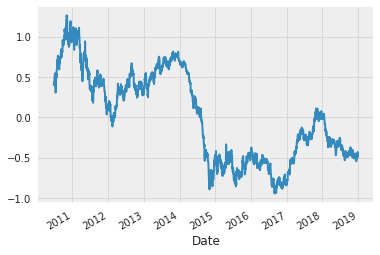

In [ ]:
df2['close'].plot()

In [ ]:
# How many periods looking back to learn
n_per_in  = 90
# How many periods to predict
n_per_out = 30
# Features 
n_features = df2.shape[1]
# Splitting the data into appropriate sequences
X, y = split_sequence(df2.to_numpy(), n_per_in, n_per_out)

In [ ]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.7):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model2.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model2.add(Dropout(d_rate))
        except:
            pass

In [ ]:
## Creating the NN

# Instatiating the model
model2 = Sequential()

# Activation
activ = "tanh"

# Input layer
model2.add(LSTM(90, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=2, 
            n_nodes=30, 
            activation=activ)

# Final Hidden layer
model2.add(LSTM(60, activation=activ))

# Output layer
model2.add(Dense(n_per_out))

# model summary
model2.summary()

# Compiling the data with selected specifications
model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 90, 90)            64080     
                                                                 
 lstm_14 (LSTM)              (None, 90, 30)            14520     
                                                                 
 lstm_15 (LSTM)              (None, 90, 30)            7320      
                                                                 
 lstm_16 (LSTM)              (None, 60)                21840     
                                                                 
 dense_2 (Dense)             (None, 30)                1830      
                                                                 
Total params: 109,590
Trainable params: 109,590
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Fitting and Training
res2 = model2.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
15/15 [==============================] - 10s 225ms/step - loss: 0.2105 - accuracy: 0.0445 - val_loss: 0.0380 - val_accuracy: 0.1379
Epoch 2/50
15/15 [==============================] - 2s 100ms/step - loss: 0.0539 - accuracy: 0.0549 - val_loss: 0.0313 - val_accuracy: 0.0345
Epoch 3/50
15/15 [==============================] - 1s 101ms/step - loss: 0.0259 - accuracy: 0.0329 - val_loss: 0.0228 - val_accuracy: 0.0296
Epoch 4/50
15/15 [==============================] - 2s 101ms/step - loss: 0.0143 - accuracy: 0.0318 - val_loss: 0.0287 - val_accuracy: 0.0246
Epoch 5/50
15/15 [==============================] - 2s 101ms/step - loss: 0.0098 - accuracy: 0.0395 - val_loss: 0.0300 - val_accuracy: 0.0345
Epoch 6/50
15/15 [==============================] - 2s 101ms/step - loss: 0.0077 - accuracy: 0.0450 - val_loss: 0.0247 - val_accuracy: 0.0345
Epoch 7/50
15/15 [==============================] - 2s 101ms/step - loss: 0.0063 - accuracy: 0.0461 - val_loss: 0.0309 - val_accuracy: 0.0296
Epoch

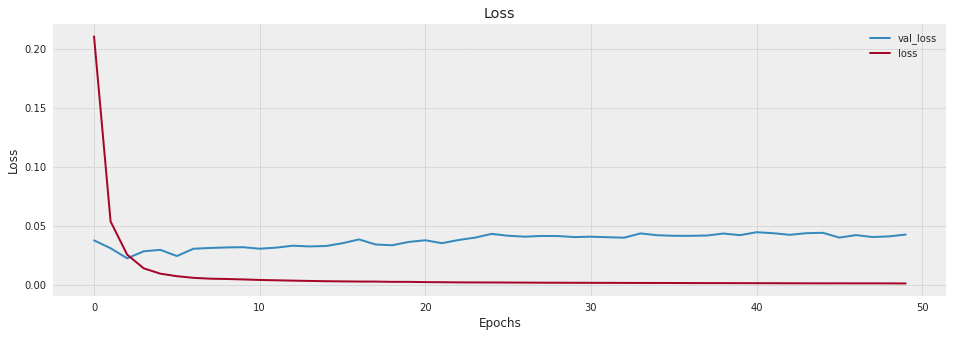

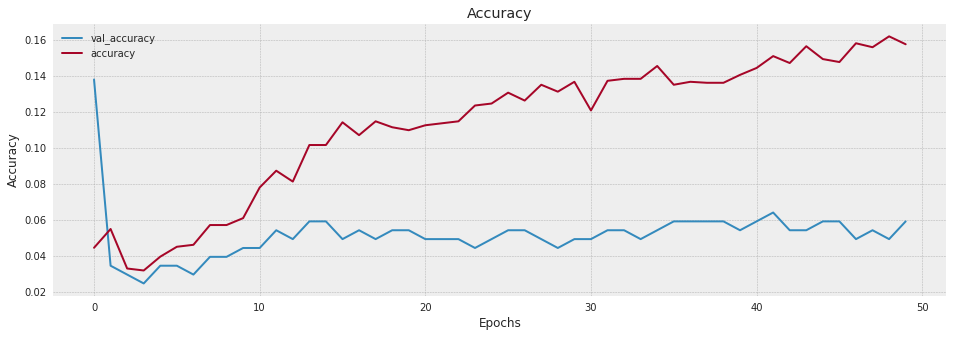

In [ ]:
visualize_training_results(res2)

In [ ]:
def validater(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model with the corresponding index values based on a business day frequency
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=df2.index, columns=[df2.columns[0]])

    for i in range(n_per_in, len(df2)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = df2[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # df2 to store the values and append later, frequency uses business days
        pred_df2 = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="B"),
                               columns=[x.columns[0]])

        # Updating the predictions df2
        predictions.update(pred_df2)
        
    return predictions

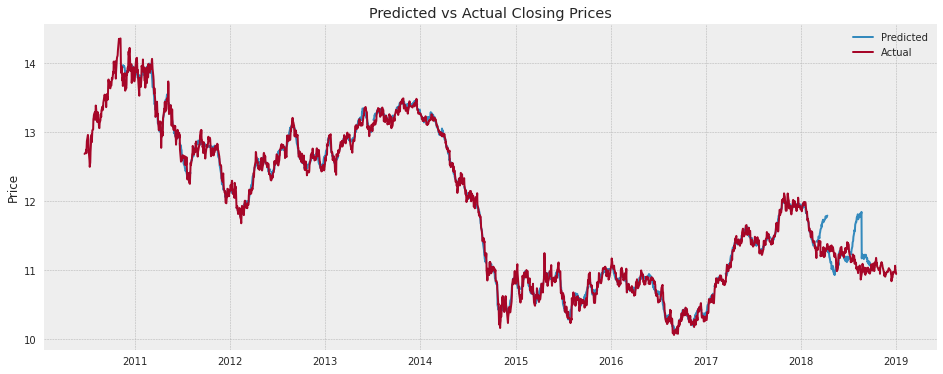

In [ ]:
# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df2[["close"]]), 
                      index=df2.index, 
                      columns=[df2.columns[0]])

# Getting a DF of the predicted values to validate against
predictions = validater(n_per_in, n_per_out)

# Printing the RMSE
# print("RMSE:", val_rmse(actual, predictions))
    
# Plotting
plt.figure(figsize=(16,6))

# Plotting those predictions
plt.plot(predictions, label='Predicted')

# Plotting the actual values
plt.plot(actual, label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
#plt.xlim('2017-05', '2018-05')
plt.show()

In [ ]:
# Predicting off of the most recent days from the original DF
yhat = model.predict(np.array(df2.tail(n_per_in)).reshape(1, n_per_in, n_features))

# Transforming the predicted values back to their original format
yhat = close_scaler.inverse_transform(yhat)[0]

# Creating a df2 of the predicted prices
preds = pd.DataFrame(yhat, 
                     index=pd.date_range(start=df2.index[-1]+timedelta(days=1), 
                                         periods=len(yhat), 
                                         freq="B"), 
                     columns=[df2.columns[0]])

# Number of periods back to plot the actual values
pers = n_per_in

# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df2[["close"]].tail(pers)), 
                      index=df2.close.tail(pers).index, 
                      columns=[df2.columns[0]]).append(preds.head(1))

# Printing the predicted prices
print(preds)

# Plotting
plt.figure(figsize=(16,6))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.show()

# <hr></hr>

**getWindowPrice**
  * getWindowPrice เรียกข้อมูลย้อนหลังเท่ากับขนาดของ windowsize ที่กำหนด โดยข้อมูลจะเปลี่ยนไปเรื่อยๆตามเวลาปัจจุบัน

In [ ]:
observers.getWindowPrice()

{'Asset01':                  open       high        low      close  volume
 timestamp                                                     
 2010-06-23  12.707242  12.785209  12.661818  12.687096   74937
 2010-06-24  12.686903  12.765063  12.666176  12.690777   69683
 2010-06-25  12.690292  12.736782  12.644093  12.697363   57886
 2010-06-28  12.696878  12.733683  12.682738  12.708017   25555
 2010-06-29  12.700268  12.754797  12.660462  12.747920   46179
 2010-06-30  12.748017  12.856008  12.681188  12.696588   61634
 2010-07-01  12.695232  12.821432  12.671503  12.801383   56086
 2010-07-02  12.801189  12.894750  12.801189  12.871892   59245
 2010-07-06  12.871892  12.999932  12.868212  12.962450   46251
 2010-07-07  12.924387  12.973007  12.833151  12.929810   63212
 2010-07-08  12.930585  13.010295  12.873636  12.891553   80673
 2010-07-09  12.891069  12.905403  12.712472  12.734748   83725
 2010-07-12  12.735717  12.755475  12.574843  12.593052   73723
 2010-07-13  12.592664  12.61

**getLogWallet**
  * getLogWallet เป็น DataFrame ที่เก็บข้อมูล Cashbalance และ NetAssetValue เรียงตามเวลา โดยเมื่อขยับ Step ของ env แล้ว Dataframe getLogWallet จะทำการอัพเดตข้อมูลที่เวลาถัดไป
    * CashBalance เป็นเงินสดที่สามารถนำไปเปิด Position ใหม่ได้
    * NetAssetValue เป็นมูลค่าของทั้ง Portfolio ยกตัวอย่างเช่น Portfolio มี CashBalance 1000 เหรียญ มี ETH ขนาด 500 เหรียญ แต่ ETH อยู่ในสถานะกำไร 200 เหรียญ ดังนั้นแล้ว NetAssetValue จะเท่ากับ 1000 + 500 + 200 = 1700 เหรียญ

In [ ]:
observers.getLogWallet()

,Timestamp,CashBalance,NetAssetValue
0,2010-06-23,100000,100000
1,2010-06-24,100000,100000
2,2010-06-25,100000,100000
3,2010-06-28,100000,100000
4,2010-06-29,100000,100000
5,2010-06-30,100000,100000
6,2010-07-01,100000,100000
7,2010-07-02,100000,100000
8,2010-07-06,100000,100000
9,2010-07-07,100000,100000


In [ ]:
observers.getCashBalance()

100000

In [ ]:
observers.getNetAssetValue()

100000

**getPosition**
  * getPosition เป็น DataFrame ที่เก็บ Position ปัจจุบันที่เปิดค้างไว้
    * Timestamp  - เวลาที่เปิดสัญญา
    * Id         - รหัสประจำ Position นั้นๆ
    * Symbol     - Asset ที่เปิดสัญญา
    * EntryPrice - ราคาที่เปิดสัญญา
    * MarkPrice  - ราคาปัจจุบัน (ราคาจะอัพเดตทุกๆ step)
    * Type       - ประเภทของสัญญา Long หรือ Short
    * Margin     - Position Size
    * Unit       - จำนวน coin ที่ได้
    * P/L        - กำไรขาดทุนที่เวลาปัจจุบัน (อัพเดตทุกๆ step)
    * %Changes   - %กำไรขาดทุนที่เวลาปัจจุบัน (อัพเดตทุกๆ step)

In [ ]:
observers.getPosition()

,Timestamp,Id,Symbol,EntryPrice,MarkPrice,Type,Margin,Unit,P/L,%Changes


**getLogPosition**
  * getLogPosition เป็น DataFrame ที่เก็บข้อมูลการซื้อค้าย้อนหลัง
    * Timestamp  - เวลาที่เปิดสัญญา
    * Id         - รหัสประจำ Position นั้นๆ
    * Symbol     - Asset ที่เปิดสัญญา
    * EntryPrice - ราคาที่เปิดสัญญา
    * Type       - ประเภทของสัญญา Long หรือ Short
    * Margin     - Position Size
    * Unit       - จำนวน coin ที่ได้
    * Fee        - ค่าธรรมเนียม
    * ฉomment       - บอกลักษณะการปิดสัญญา

In [ ]:
observers.getLogPosition()

,Timestamp,Symbol,Id,EntryPrice,Type,Margin,Unit,Fee,Comment


**getLogPortion**
  * Time - Step จะเป็น columns ที่บอกการอัพเดต โดย First Step เป็นการอัพเดตครั้งแรกก่อนทำการเปิดปิดสัญญาใดๆ ส่วน Final Step จะอัพเดตหลังมีการเปิดปิดสัญญาใดๆตาม order ที่ส่งเข้ามาในฟังก์ชัน observers.step(order) เรียบร้อยแล้ว
  * Cash - Asset_Allocation   คือสัดส่วนของเงินสดต่อมูลค่า portfolio (Net Asset Value)
  * Cash - Cash Balance         คือจำนวนเงินสดคงเหลือ
  * LongPosition_value คือ รวมของมูลค่า Position Long ของ Asset ที่มีการเปิดสัญญาอยู่ รวมมูลค่ากำไรขาดทุนที่เวลาปัจจุบัน
  * ShortPosition_value คือ รวมของมูลค่า Position Short ของ Asset ที่มีการเปิดสัญญาอยู่ รวมมูลค่ากำไรขาดทุนที่เวลาปัจจุบัน
  * NetHedgValue คือ ผลรวมของ LongPosition_value และ ShortPosition_value 
  เนื่องจาก ShortPosition_value มีค่าติดลบ ดังนั้นแล้ว NetHegdValue มีค่าติดลบได้ 
  ยกตัวอย่าง มีสัญญา ETH long ขนาด 5000 เหรียญ และมี ETH Short ขนาด 10000 เหรียญ เพราะฉนั้น NetHegdValue จะทำกับ -5000 เหรียญ
  * Portion   คือ สัดส่วน abs(NetHedgValue) ต่อ มูลค่ารวมของทั้ง portfolio (Net Asset Value)
    * Portion จะเป็นตัวกำหนดสัดส่วนของ Asset ใน Portfolio ยกตัวอย่าง โจทย์กำหนดให้ Portfolio ต้องมี ETH น้อยกว่าเท่ากับ 25 % และ Sol น้อยกว่าเท่ากับ 30 %ของ Portfolio ณ เวลาปัจจุบันมี NAV. อยู่ที่ 100,000 เหรียญ มีมูลค่ารวม ETH Long อยู่ที่ 10,000 ดังนั้นแล้วจะสามารถเปิด Position ETH Long เพิ่มได้อีก 15,000 เหรียญ รวมเป็น 25,000 เหรียญ คิดเป็น 25% ของ NAV. ในกรณีที่ต้องการเปิด Short Position จะสามารถเปิดสูงที่ 35,000 เหรียญ คิดจากShortสูงสุดที่เปิดได้ คือ -25,000 แต่ปัจจุบันเปิด Long 10,000 ดังนั้นแล้ว Short ที่เปิดได้คือ 10,000 + Short = - 25,000 >> short =  -35,000 
  ส่วนนี้หากมีการออก order ที่มีขนาดใหญ่กว่าสัดส่วนที่กำหนด ระบบจะทำการซื้อขายให้เท่าที่สามารถทำได้ เช่น Long ได้สูงสุดที่ 25,000 เหรียญ ปัจจุบันเปิด Long ไว้มูลค่า 20,000 เหรียญ แต่มีการส่ง Order Long ขนาด 50,000 เหรียญมา ระบบจะทำการ open long ให้ขนาด 5,000 เหรียญ เท่านั้น
  * Asset Value           คือ มูลค่ารวมของ Asset --- Long Position + abs(Short Position)
  * Asset_Allocation  คือ สัดส่วน Asset Value ต่อ มูลค่ารวมของทั้ง portfolio (Net Asset Value)


In [ ]:
observers.getLogPortion()

Asset01                   ...        Time            
   AssetValue Asset_Allocation  ...        Step   Timestamp
0           0              0.0  ...  First Step  2010-06-23
1           0              0.0  ...  Final Step  2010-06-23
2           0              0.0  ...  First Step  2010-06-24
3           0              0.0  ...  Final Step  2010-06-24
4           0              0.0  ...  First Step  2010-06-25
5           0              0.0  ...  Final Step  2010-06-25
6           0              0.0  ...  First Step  2010-06-28
7           0              0.0  ...  Final Step  2010-06-28
8           0              0.0  ...  First Step  2010-06-29
9           0              0.0  ...  Final Step  2010-06-29
10          0              0.0  ...  First Step  2010-06-30
11          0              0.0  ...  Final Step  2010-06-30
12          0              0.0  ...  First Step  2010-07-01
13          0              0.0  ...  Final Step  2010-07-01
14          0              0.0  ...  First Step  2010-07-02
15          0              0.0  ...  Final Step  2010-07-02
16          0              0.0  ...  First Step  2010-07-06
17          0              0.0  ...  Final Step  2010-07-06
18          0              0.0  ...  First Step  2010-07-07
19          0              0.0  ...  Final Step  2010-07-07
20          0              0.0  ...  First Step  2010-07-08
21          0              0.0  ...  Final Step  2010-07-08
22          0              0.0  ...  First Step  2010-07-09
23          0              0.0  ...  Final Step  2010-07-09
24          0              0.0  ...  First Step  2010-07-12
25          0              0.0  ...  Final Step  2010-07-12
26          0              0.0  ...  First Step  2010-07-13
27          0              0.0  ...  Final Step  2010-07-13
28          0              0.0  ...  First Step  2010-07-14
29          0              0.0  ...  Final Step  2010-07-14
30          0              0.0  ...  First Step  2010-07-15
31          0              0.0  ...  Final Step  2010-07-15
32          0              0.0  ...  First Step  2010-07-16
33          0              0.0  ...  Final Step  2010-07-16
34          0              0.0  ...  First Step  2010-07-19
35          0              0.0  ...  Final Step  2010-07-19
36          0              0.0  ...  First Step  2010-07-20
37          0              0.0  ...  Final Step  2010-07-20
38          0              0.0  ...  First Step  2010-07-21
39          0              0.0  ...  Final Step  2010-07-21
40          0              0.0  ...  First Step  2010-07-22
41          0              0.0  ...  Final Step  2010-07-22
42          0              0.0  ...  First Step  2010-07-23
43          0              0.0  ...  Final Step  2010-07-23
44          0              0.0  ...  First Step  2010-07-26
45          0              0.0  ...  Final Step  2010-07-26
46          0              0.0  ...  First Step  2010-07-27
47          0              0.0  ...  Final Step  2010-07-27
48          0              0.0  ...  First Step  2010-07-28
49          0              0.0  ...  Final Step  2010-07-28
50          0              0.0  ...  First Step  2010-07-29
51          0              0.0  ...  Final Step  2010-07-29
52          0              0.0  ...  First Step  2010-07-30
53          0              0.0  ...  Final Step  2010-07-30
54          0              0.0  ...  First Step  2010-08-02
55          0              0.0  ...  Final Step  2010-08-02
56          0              0.0  ...  First Step  2010-08-03
57          0              0.0  ...  Final Step  2010-08-03
58          0              0.0  ...  First Step  2010-08-04
59          0              0.0  ...  Final Step  2010-08-04

[60 rows x 34 columns]

**step**
  * step เป็นตัวรับส่งคำสั่งซื้อขาย และขยับเวลา

In [ ]:
order = [{'symbol':'Asset01','open_long':1000}]
status,price_df,liq_position,done = observers.step(order)

In [ ]:
status

[{'Note': 'Order placed', 'Position id': 1}]

In [ ]:
price_df

{'Asset01':                  open       high        low      close  volume
 timestamp                                                     
 2010-06-24  12.686903  12.765063  12.666176  12.690777   69683
 2010-06-25  12.690292  12.736782  12.644093  12.697363   57886
 2010-06-28  12.696878  12.733683  12.682738  12.708017   25555
 2010-06-29  12.700268  12.754797  12.660462  12.747920   46179
 2010-06-30  12.748017  12.856008  12.681188  12.696588   61634
 2010-07-01  12.695232  12.821432  12.671503  12.801383   56086
 2010-07-02  12.801189  12.894750  12.801189  12.871892   59245
 2010-07-06  12.871892  12.999932  12.868212  12.962450   46251
 2010-07-07  12.924387  12.973007  12.833151  12.929810   63212
 2010-07-08  12.930585  13.010295  12.873636  12.891553   80673
 2010-07-09  12.891069  12.905403  12.712472  12.734748   83725
 2010-07-12  12.735717  12.755475  12.574843  12.593052   73723
 2010-07-13  12.592664  12.610873  12.498329  12.499395   82379
 2010-07-14  12.488160  12.55

liq_position - ตัวบอกสถานะการบังงคับขาย หาก Position ใด อยู่ในสถานะติดลบที่มากกว่าการวางเงินเริ่มต้นแล้ว รับบจะทำการบังคับขาย โดย liq_position จะreture id ของ position ที่โดน liq

In [ ]:
liq_position

[]

In [ ]:
done

False

In [ ]:
observers.getLogWallet().tail(5)

,Timestamp,CashBalance,NetAssetValue
26,2010-07-30,100000,100000
27,2010-08-02,100000,100000
28,2010-08-03,100000,100000
29,2010-08-04,100000,100000
30,2010-08-05,99000,99999.6


In [ ]:
observers.getPosition()

,Timestamp,Id,Symbol,EntryPrice,MarkPrice,Type,Margin,Unit,P/L,%Changes
0,2010-08-05,1,Asset01,13.388798,13.388798,Long,999.6,74.659428,0.0,0.0


In [ ]:
observers.getLogPosition()

,Timestamp,Symbol,Id,EntryPrice,Type,Margin,Unit,Fee,Comment
0,2010-08-05,Asset01,1,13.388798,Open_Long,999.6,74.659428,0.4,-


In [ ]:
order = []
status,price_df,liq_position,done = observers.step(order)

In [ ]:
observers.getPosition()

,Timestamp,Id,Symbol,EntryPrice,MarkPrice,Type,Margin,Unit,P/L,%Changes
0,2010-08-05,1,Asset01,13.388798,13.196351,Long,999.6,74.659428,-14.368012,-1.437376


In [ ]:
observers.getLogWallet().tail(5)

,Timestamp,CashBalance,NetAssetValue
28,2010-08-03,100000,100000
29,2010-08-04,100000,100000
30,2010-08-05,99000,99999.6
31,2010-08-06,99000,99998.204416
32,2010-08-09,99000,99985.231988


In [ ]:
order = [{'symbol':'Asset01','open_long':1000},{'symbol':'Asset02','open_short':1000},{'symbol':'Asset03','open_short':3000},{'symbol':'Asset04','open_short':3000},{'symbol':'Asset05','open_short':3000}]
status,price_df,liq_position,done = observers.step(order)

In [ ]:
observers.getLogWallet().tail(5)

,Timestamp,CashBalance,NetAssetValue
29,2010-08-04,100000,100000
30,2010-08-05,99000,99999.6
31,2010-08-06,99000,99998.204416
32,2010-08-09,99000,99985.231988
33,2010-08-10,88000,99977.570804


In [ ]:
observers.getPosition()

,Timestamp,Id,Symbol,EntryPrice,MarkPrice,Type,Margin,Unit,P/L,%Changes
0,2010-08-05,1,Asset01,13.388798,13.152670,Long,999.6,74.659428,-17.629196,-1.763625
1,2010-08-10,2,Asset01,13.152670,13.152670,Long,999.6,75.999779,0.000000,0.000000
2,2010-08-10,3,Asset02,79.692157,79.692157,Short,-999.6,-12.543267,-0.000000,-0.000000
3,2010-08-10,4,Asset03,11.446187,11.446187,Short,-2998.8,-261.991183,-0.000000,-0.000000
4,2010-08-10,5,Asset04,8.367573,8.367573,Short,-2998.8,-358.383487,-0.000000,-0.000000
5,2010-08-10,6,Asset05,16.180555,16.180555,Short,-2998.8,-185.333573,-0.000000,-0.000000


In [ ]:
observers.getLogPosition()

,Timestamp,Symbol,Id,EntryPrice,Type,Margin,Unit,Fee,Comment
0,2010-08-05,Asset01,1,13.388798,Open_Long,999.6,74.659428,0.4,-
1,2010-08-10,Asset01,2,13.152670,Open_Long,999.6,75.999779,0.4,-
2,2010-08-10,Asset02,3,79.692157,Open_Short,-999.6,-12.543267,0.4,-
3,2010-08-10,Asset03,4,11.446187,Open_Short,-2998.8,-261.991183,1.2,-
4,2010-08-10,Asset04,5,8.367573,Open_Short,-2998.8,-358.383487,1.2,-
5,2010-08-10,Asset05,6,16.180555,Open_Short,-2998.8,-185.333573,1.2,-


In [ ]:
order = [{'symbol':'Asset01','close_all':1},{'symbol':'Asset02','close_short':4}]
status,price_df,liq_position,done = observers.step(order)

In [ ]:
observers.getLogWallet().tail(5)

,Timestamp,CashBalance,NetAssetValue
30,2010-08-05,99000,99999.6
31,2010-08-06,99000,99998.204416
32,2010-08-09,99000,99985.231988
33,2010-08-10,88000,99977.570804
34,2010-08-11,89980.39894,99890.809962


In [ ]:
observers.getPosition()

,Timestamp,Id,Symbol,EntryPrice,MarkPrice,Type,Margin,Unit,P/L,%Changes
0,2010-08-10,3,Asset02,79.692157,77.477655,Short,-999.6,-12.543267,27.777089,2.77882
1,2010-08-10,4,Asset03,11.446187,11.611548,Short,-2998.8,-261.991183,-43.323078,-1.44468
2,2010-08-10,5,Asset04,8.367573,8.401867,Short,-2998.8,-358.383487,-12.290287,-0.40984
3,2010-08-10,6,Asset05,16.180555,16.492170,Short,-2998.8,-185.333573,-57.752700,-1.92586


In [ ]:
observers.getLogPosition()

,Timestamp,Symbol,Id,EntryPrice,Type,Margin,Unit,Fee,Comment
0,2010-08-05,Asset01,1,13.388798,Open_Long,999.600000,74.659428,0.400000,-
1,2010-08-10,Asset01,2,13.152670,Open_Long,999.600000,75.999779,0.400000,-
2,2010-08-10,Asset02,3,79.692157,Open_Short,-999.600000,-12.543267,0.400000,-
3,2010-08-10,Asset03,4,11.446187,Open_Short,-2998.800000,-261.991183,1.200000,-
4,2010-08-10,Asset04,5,8.367573,Open_Short,-2998.800000,-358.383487,1.200000,-
5,2010-08-10,Asset05,6,16.180555,Open_Short,-2998.800000,-185.333573,1.200000,-
6,2010-08-11,Asset01,1,13.150152,Close_Long,981.782798,74.659428,0.392713,-
7,2010-08-11,Asset01,2,13.150152,Close_Long,999.408619,75.999779,0.399763,-


**getLogOrder**
  getLogOrder เป็น Dataframe ที่บันทึกการซื้ขายทั้งหมด 
  * เมื่อต้องการที่จะส่งคำตอบ ให้ประกาศ Observers(window,train=False) หลังจากนั้นทำการซื้อขายตามโมเดลที่สร้างมา getLogOrder จะเก็บข้อมูลการซื้อขายทั้งหมดในชุด test ซึ่ง dataframตัวนี้จำเป็นต้องนำส่งเพื่อตรวจคำตอบ

In [ ]:
observers.getLogOrder()

,Timestamp,Order
0,2010-06-23,[]
1,2010-06-24,[]
2,2010-06-25,[]
3,2010-06-28,[]
4,2010-06-29,[]
5,2010-06-30,[]
6,2010-07-01,[]
7,2010-07-02,[]
8,2010-07-06,[]
9,2010-07-07,[]


**save_csv**
  * save_csv บันทึกข้อมูลลงไฟล์ csv 
    * นำไฟล์ csv - log_order.csv ไปใช้ในการส่งคำตอบ

In [ ]:
observers.save_csv()

In [ ]:
observers = Observers(30,train=False)

In [ ]:
observers.getWindowPrice()

{'Asset01':                  open       high        low      close  volume
 timestamp                                                     
 2018-11-15  10.963399  10.973084  10.912939  10.920009   47074
 2018-11-16  10.919525  10.982382  10.903060  10.968242   51206
 2018-11-19  10.969695  10.984126  10.905190  10.905190   58633
 2018-11-20  10.906546  10.953617  10.894827  10.938508   69496
 2018-11-21  10.939573  10.950033  10.880105  10.935215   63578
 2018-11-23  10.936377  10.976862  10.933375  10.952261   39401
 2018-11-26  10.952842  10.999719  10.920203  10.982576   63496
 2018-11-27  10.983060  11.012891  10.967951  10.978411   62866
 2018-11-28  10.980058  11.008339  10.963496  10.976377   74361
 2018-11-29  10.975312  10.997879  10.959622  10.973762   58498
 2018-11-30  10.976571  11.009404  10.970566  10.998654   55710
 2018-12-03  10.999041  11.043594  10.987709  11.029647   63522
 2018-12-04  11.030325  11.044368  11.004368  11.010760   62231
 2018-12-06  11.011438  11.05